<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/03_pytorch_computer_version_exercise_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 03. PyTorch Computer Version Exercise
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
%pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.6 MB/s eta 0:00:00


In [ ]:
import torchmetrics

## 1.What are 3 areas in industry where computer vision is currently beging used?

## 2.Search "What is overfitting in machine learning"

## 3.Search "ways to prevent overfitting in machine learning", write down 3 of things you find a sentences about each

##4.Spend 20-minutes reading and clicking through CNN Explainier Website

## 5.Load the torchversion.datasets.MNIST() train and test datasets

In [ ]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5086354.14it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 131977.23it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1273931.52it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3762695.79it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
img = train_data_set[0][0]
label = train_data_set[0][1]
print(f"img shape:{img.shape}")
print(f"lable is:{label}")

img shape:torch.Size([1, 28, 28])
lable is:5


In [ ]:
class_names = train_data_set.classes

In [ ]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6.Visualize at least 5 different samples of the FashionMNIST training sets

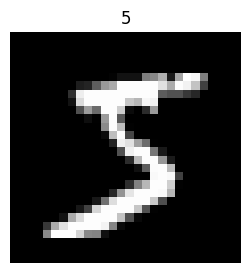

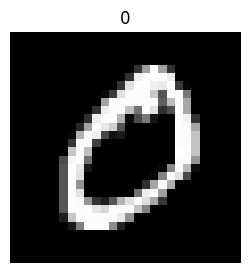

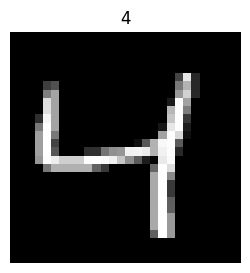

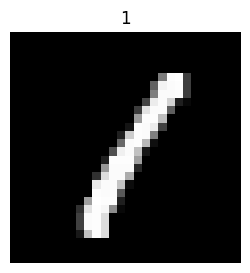

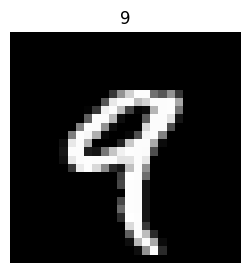

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  img, label = train_data_set[i]
  plt.figure(figsize=(3,3))
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7.Turn the MINIST train and test datasets into dataloaders using `torch.utils.data.DataLoader` set the `batch_size=32`

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data_set, 32, shuffle=True)
test_dataloader = DataLoader(test_data_set, 32, shuffle=False)


In [ ]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8.Recreate `model_2` using in notebook03 capable of fitting on the MNIST dataset

In [ ]:
class MINISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
  def forward(self, x):
    return self.linear_stack(self.block2(self.block1(x)))

In [ ]:
model = MINISTModel(1, 10, len(class_names)).to(device)

In [ ]:
# setup loss function and optimizer and accuracy function
from torchmetrics import Accuracy
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

In [ ]:
# set train function
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  train_loss = 0
  train_acc = 0

  model.to(device)
  for _, (X, y) in enumerate(dataloader):
    model.train()
    X = X.to(device)
    y = y.to(device)

    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  print(f"Train loss:{train_loss}|")


In [ ]:
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, device: torch.device = device):

  model.eval()
  test_loss = 0
  model.to(device)
  with torch.inference_mode():
    for _, (X, y) in enumerate(dataloader):
      X = X.to(device)
      y = y.to(device)

      y_logits = model(X)
      test_loss += loss_fn(y_logits, y)
    test_loss /= len(dataloader)
  print(f"Test loss:{test_loss}")

In [ ]:
def print_train_time(start, end, device=device):
  interval = end - start
  print(f"Train time on {device}: {interval:.3f} seconds")
  return interval

In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 5
start = timer()
for i in tqdm(range(epochs)):
  print(f"Epoch: {i} \n ================")
  train_step(model, train_dataloader, loss_fn, optimizer)
  test_step(model, test_dataloader, loss_fn)
end = timer()

print_train_time(start, end)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
Train loss:0.3145988881587982|
Test loss:0.08153774589300156
Epoch: 1 
Train loss:0.0686468631029129|
Test loss:0.0446026474237442
Epoch: 2 
Train loss:0.0539395809173584|
Test loss:0.04166129231452942
Epoch: 3 
Train loss:0.04553350433707237|
Test loss:0.03574221208691597
Epoch: 4 
Train loss:0.038895219564437866|
Test loss:0.039702482521533966
Train time on cuda: 61.138 seconds


61.13772202800001

In [ ]:
# Train time on cpu: 133.114 seconds
# Train time on cuda: 61.138 seconds

## 10.Make predictions using above model and visitlize at least 5 of them comparing the prediction to the target label

In [ ]:
def eval_mode(model: torch.nn.Module,
              dataset):

  for i in range(5):
    X, y = dataset[i]
    y_logits = model(X.unsqueeze(dim=0).to(device))
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


    plt.figure(figsize=(3,3))
    if y_pred == y:
      color = "green"
    else:
      color = "red"
    plt.title(f"pred:{class_names[y_pred]}|true:{class_names[y]}", c=color)
    plt.imshow(X.squeeze(), cmap="gray")
    plt.axis(False)


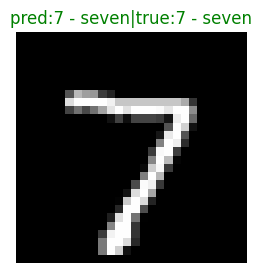

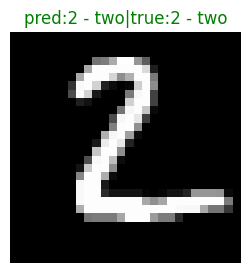

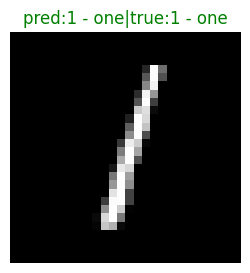

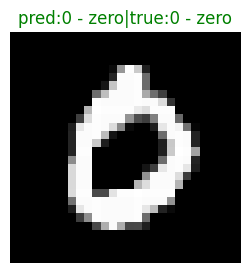

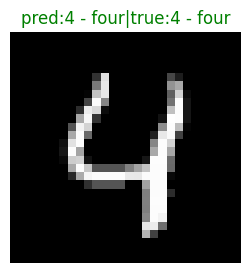

In [ ]:
eval_mode(model, test_data_set)

## 11.Plot a confusion matrix comparing your model's predictions to the truth labels

In [ ]:
from torchmetrics import ConfusionMatrix
import mlxtend

In [ ]:
def eval_model(model: torch.nn.Module,
           data_loader: torch.utils.data.DataLoader):
  model.eval()
  y_preds = []
  with torch.inference_mode():
    for X, y in data_loader:
      y_logits = model(X.to(device))
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
      y_preds.append(y_pred)

  return torch.cat(y_preds)

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

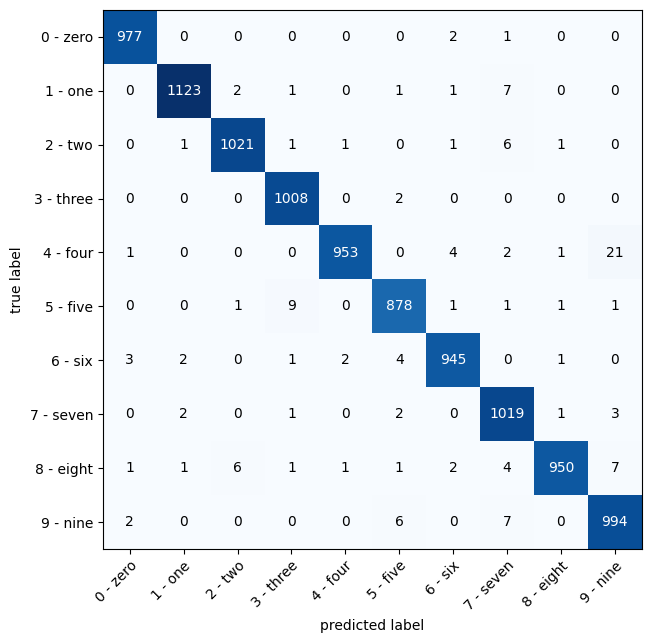

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names)).to(device)
pred_tensor = eval_model(model, test_dataloader)
confmat_tensor = confmat(pred_tensor, test_data_set.targets.to(device))

# plot
plot_confusion_matrix(
    conf_mat=confmat_tensor.cpu().numpy(),
    class_names=class_names,
    figsize=(10,7)
)


## 12.Create a random tensor of shape[1, 3, 64, 64] and pass through a `nn.Conv2d()` layer with various hyperparameters settings

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1)
random_tensor_through_conv_layer = conv2d_layer(random_tensor)
print(f"random_tensor_through_conv_layer's shape is {random_tensor_through_conv_layer.shape}")

random_tensor_through_conv_layer's shape is torch.Size([1, 64, 32, 32])


## 13.Use a model similiar to trained `model2` from notebook 03 to make predictions on test `torchvision.datasets.FashionMNIST` dataset

In [ ]:
fsh_train_data_set = datasets.FashionMNIST(root=".", download=True, train=True, transform=ToTensor())
fsh_test_data_set = datasets.FashionMNIST(root=".", download=True, train=False, transform=ToTensor())
len(fsh_train_data_set), len(fsh_test_data_set)

In [ ]:
fsh_train_dataloader = DataLoader(fsh_train_data_set, batch_size=32, shuffle=True)
fsh_test_dataloader = DataLoader(fsh_test_data_set, batch_size=32, shuffle=False)


In [ ]:
fashion_class_names = fsh_train_data_set.classes

In [ ]:
model2 = MINISTModel(input_shape=1, hidden_units=10, output_shape=len(fashion_class_names))